<a href="https://colab.research.google.com/github/MonishSoundarRaj/data_check_generator/blob/main/JSSPP_Plots_and_Metrics_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from datetime import datetime
from collections import Counter, defaultdict
import json
from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
bw_df = pd.read_csv("blue_waters_data_training.csv")
philly_df = pd.read_csv("philly_data_training.csv")
hl_df = pd.read_csv("helios_data_training.csv")
th_df = pd.read_csv("theta_data_training.csv")
# Syn_data_below
bw_syn_df = pd.read_csv("./synthetic_data_gan_bw.csv")
philly_syn_df = pd.read_csv("./synthetic_data_gan_philly.csv")
helios_syn_df = pd.read_csv("./synthetic_data_gan_helios.csv")
th_syn_df = pd.read_csv("./synthetic_data_gan_theta.csv")

In [3]:
# columns=["job", "user", "project", "state", "gpu_num", "cpu_num", "node_num",  "run_time", "wall_time", "new_status", "interval"]

In [4]:


print(f"Blue Waters shape: {bw_df.shape}")
print(f"Philly shape: {philly_df.shape}")
print(f"Helios shape: {hl_df.shape}")
print(f"Theta shape: {th_df.shape}")
print(f"Synthetic Blue Waters shape: {bw_syn_df.shape}")
print(f"Synthetic Philly shape: {philly_syn_df.shape}")
print(f"Synthetic Helios shape: {helios_syn_df.shape}")
print(f"Synthetic Theta shape: {th_syn_df.shape}")


Blue Waters shape: (15000, 12)
Philly shape: (15000, 13)
Helios shape: (15000, 13)
Theta shape: (15000, 12)
Synthetic Blue Waters shape: (15000, 12)
Synthetic Philly shape: (15000, 13)
Synthetic Helios shape: (15000, 13)
Synthetic Theta shape: (15000, 12)


In [5]:
bw_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,24119,20522,62,15,0,0,1,5019.864258,89820,203283,13966599168,Pass
1,24119,20522,62,15,0,0,1,5019.864258,89820,203283,13966599168,Pass
2,24119,20522,62,15,0,0,1,5019.864258,89820,203283,13966599168,Pass
3,24119,20522,62,15,0,0,1,5019.864258,89820,203283,13966599168,Pass
4,24119,20522,62,15,0,0,1,5019.864258,89820,203283,13966599168,Pass


In [6]:
philly_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,55247248,-42121692,34,8,48,0,8,1.476616e+09,-1.753798e+10,-3650,1.922968e+10,1.391422e+11,Killed
1,62782520,-47875536,34,8,48,0,8,1.678220e+09,-1.993274e+10,-4149,2.185314e+10,1.581360e+11,Killed
2,52356952,-39922736,34,8,48,0,8,1.399416e+09,-1.661951e+10,-3460,1.822388e+10,1.318636e+11,Killed
3,56767544,-43279564,34,8,48,0,8,1.517404e+09,-1.802007e+10,-3751,1.975454e+10,1.429625e+11,Killed
4,52608976,-40116580,34,8,48,0,8,1.406385e+09,-1.670048e+10,-3476,1.830945e+10,1.324958e+11,Killed


In [7]:
helios_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,24049,9842,6,4,1,1,1,277.129272,209629.453125,0,-1206526.875,9652388.0,Failed
1,24049,9842,6,4,1,1,1,277.129272,209629.453125,0,-1206526.875,9652388.0,Failed
2,24049,9842,6,4,1,1,1,277.129272,209629.453125,0,-1206526.875,9652388.0,Failed
3,24049,9842,6,4,1,1,1,277.129272,209629.453125,0,-1206526.875,9652388.0,Failed
4,24049,9842,6,4,1,1,1,277.129272,209629.453125,0,-1206526.875,9652388.0,Failed


In [8]:
th_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,-625599,-720458,16,30,0,100096.0,1020.0,33794688.0,16261083.0,-15153592.0,4334826.50,Pass
1,-1761272,-2027188,16,30,0,100096.0,1020.0,95530656.0,44956480.0,-42565716.0,11933328.00,Pass
2,-738836,-846547,16,30,0,100096.0,1020.0,37587908.0,17721394.0,-17617710.0,4694060.50,Pass
3,-202816,-231704,16,30,0,100096.0,930.0,11370307.0,5960921.5,-4975063.0,1621594.25,Pass
4,-733492,-843181,16,30,0,100096.0,1020.0,39068152.0,18631960.0,-17687416.0,4957299.00,Pass


In [9]:
def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100)
        plt.xlim(10**0, 10**8)
        plt.grid(True)
        plt.style.use("default")

# Core Plots

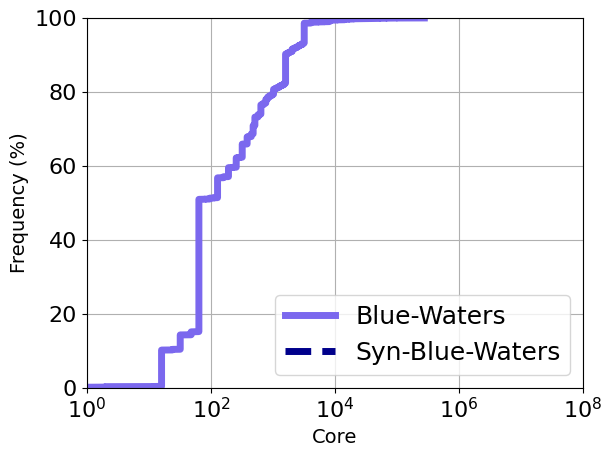

In [10]:
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_df.iterrows()], 100000, "Core", color = "#7B68EE", linestyle="-")
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_syn_df.iterrows()], 100000, "Core", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

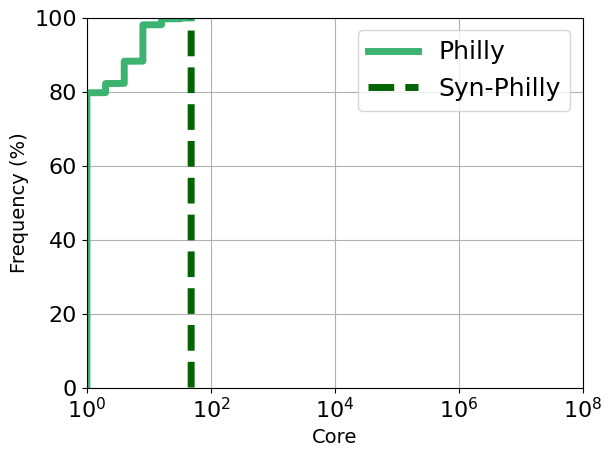

In [11]:
plot_cdf(philly_df["gpu_num"], 100000, "Core", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["gpu_num"], 100000, "Core", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

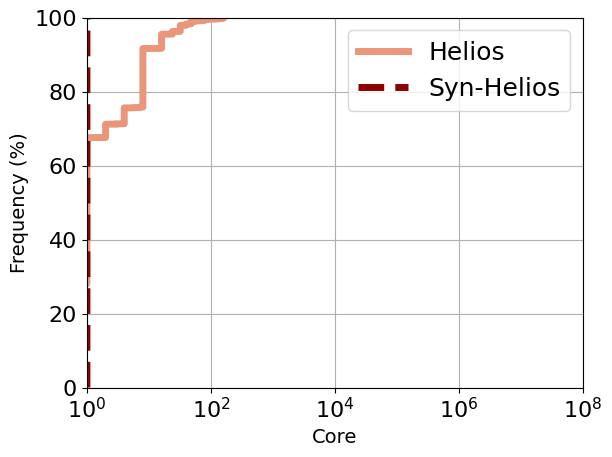

In [12]:
plot_cdf(hl_df["gpu_num"], 100000, "Core", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["gpu_num"], 100000, "Core", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

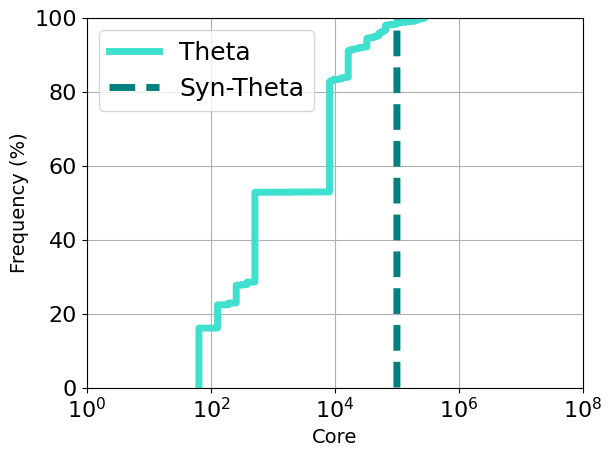

In [13]:
plot_cdf(th_df["cpu_num"], 100000, "Core", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["cpu_num"], 100000, "Core", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

#Run Time Plots

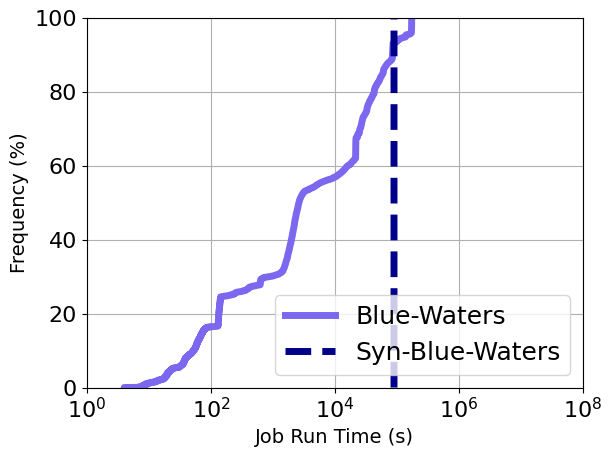

In [14]:
plt.style.use("default")
plot_cdf(bw_df["run_time"], 1000,"Job Run Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

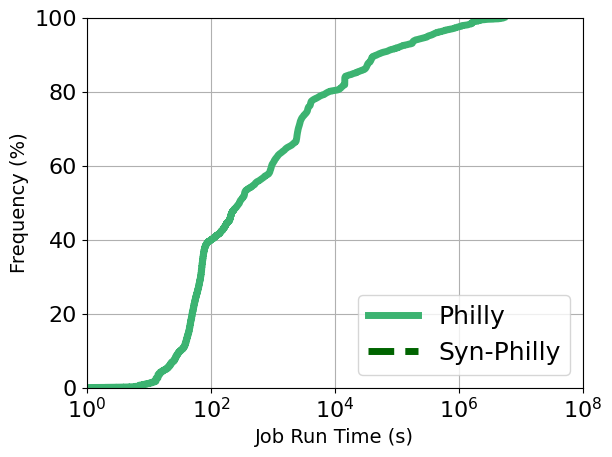

In [15]:
plt.style.use("default")
plot_cdf(philly_df["run_time"], 1000,"Job Run Time (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

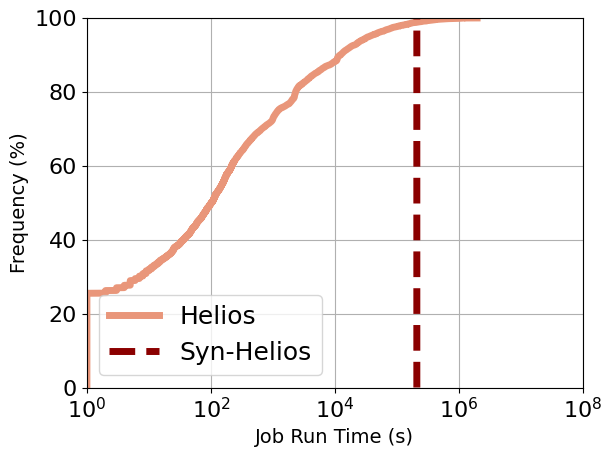

In [16]:
plt.style.use("default")
plot_cdf(hl_df["run_time"], 10009999,"Job Run Time (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["run_time"], 10009999,"Job Run Time (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

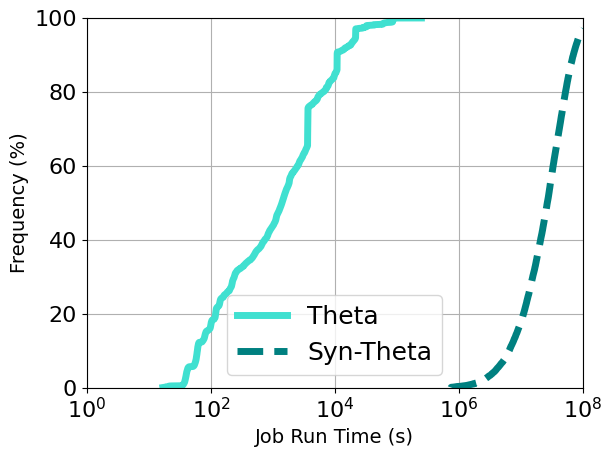

In [17]:
plt.style.use("default")
plot_cdf(th_df["run_time"], 1000, "Job Run Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["run_time"], 1000, "Job Run Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Interval Plots


In [18]:
def get_interval(a, peak=False):
    def get_time_of_day2(time):
        time = datetime.fromtimestamp(time)
        return (time.hour + (time.minute>30))%24
    if peak:
        z = a.apply(get_time_of_day2)
        b = a-a.shift(1)
        c = b[(z>=8) & (z<=17)]
        return c
    return a-a.shift(1)

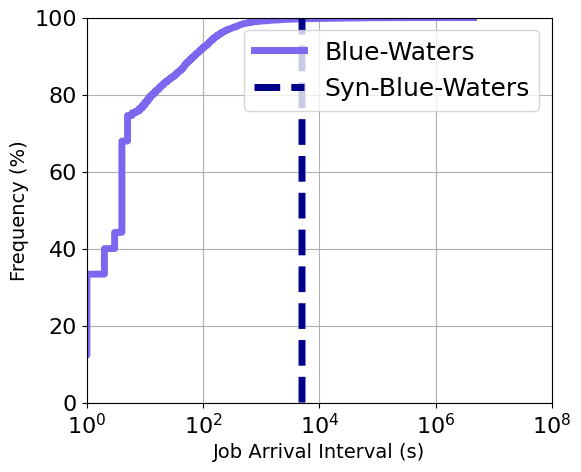

In [19]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(bw_df["interval"], 10000,"Job Arrival Interval (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["interval"], 10000,"Job Arrival Interval (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

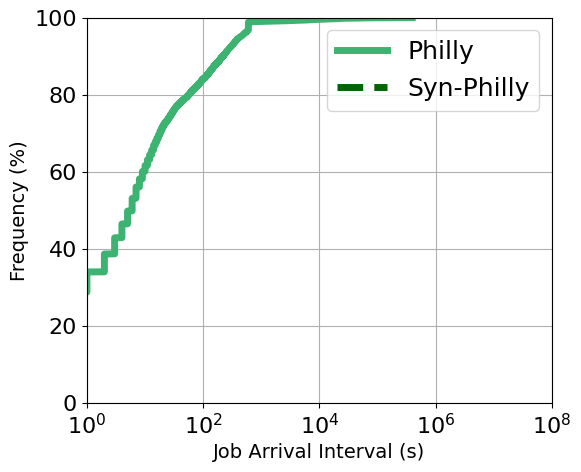

In [20]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(philly_df["interval"], 1000,"Job Arrival Interval (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["interval"], 1000,"Job Arrival Interval (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

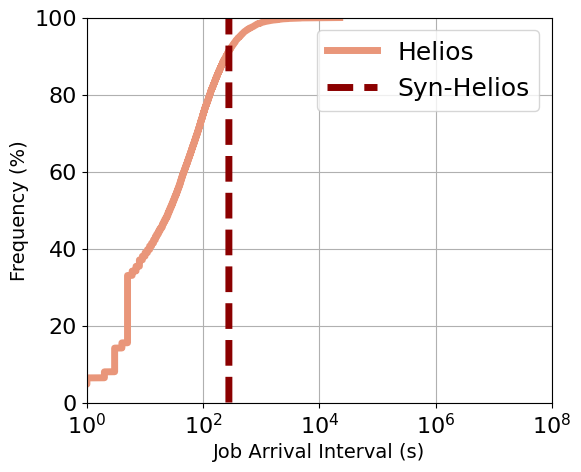

In [21]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(hl_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")


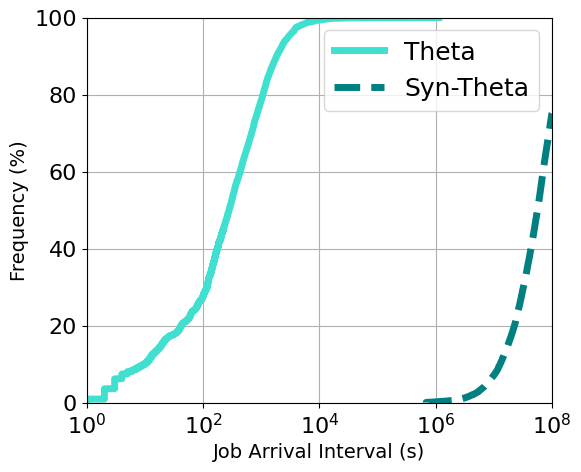

In [22]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(th_df["interval"], 100099,"Job Arrival Interval (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["interval"], 100099,"Job Arrival Interval (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# User CDF Plots

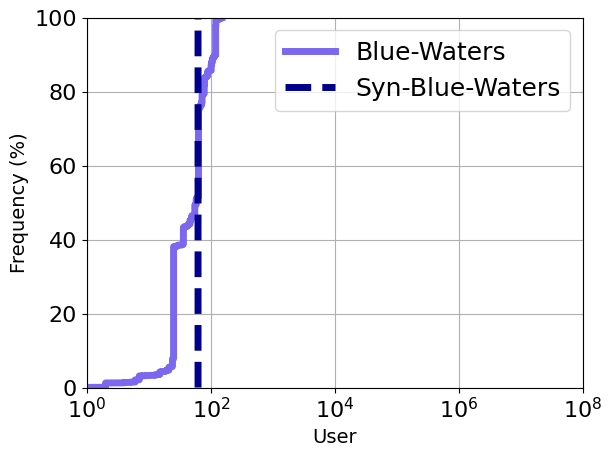

In [23]:
plt.style.use("default")
plot_cdf(bw_df["user"], 1000,"User", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["user"], 1000,"User", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

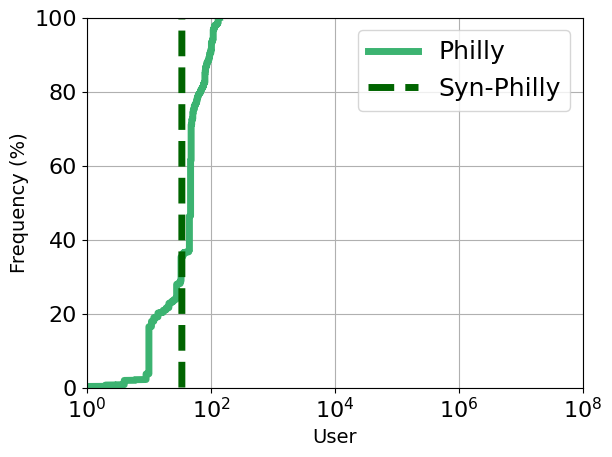

In [24]:
plt.style.use("default")
plot_cdf(philly_df["user"], 1000,"User", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["user"], 1000,"User", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

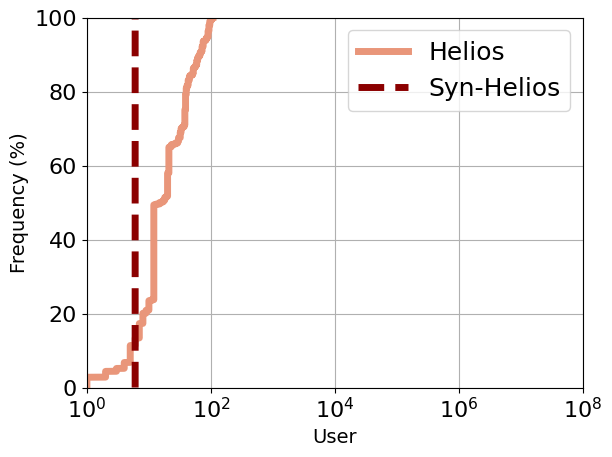

In [25]:
plt.style.use("default")
plot_cdf(hl_df["user"], 10009999,"User", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["user"], 10009999,"User", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

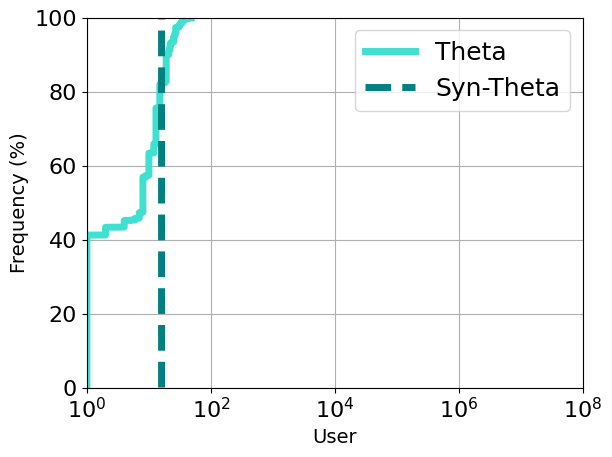

In [26]:
plt.style.use("default")
plot_cdf(th_df["user"], 1000, "User", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["user"], 1000, "User", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Wall Time Plots

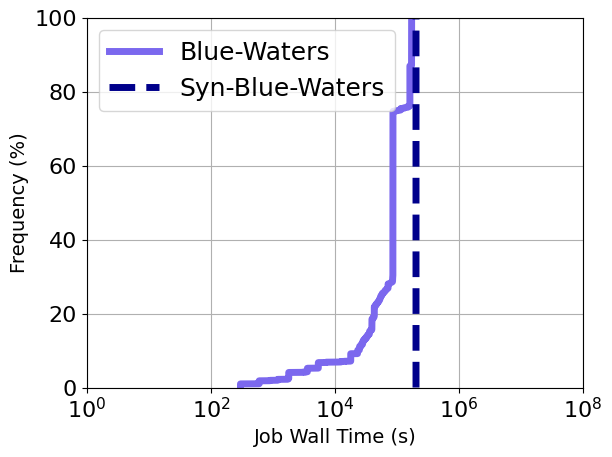

In [27]:
plt.style.use("default")
plot_cdf(bw_df["wall_time"], 1000,"Job Wall Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["wall_time"], 1000,"Job Wall Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

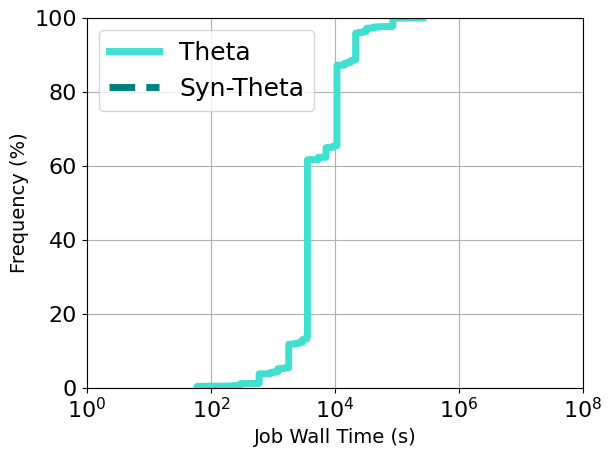

In [28]:
plt.style.use("default")
plot_cdf(th_df["wall_time"], 1000, "Job Wall Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["wall_time"], 1000, "Job Wall Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Calc Metrics

In [29]:
import argparse
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance
import os


'''
This function return a float value. It takes two data files and the interested feature as inputs.
It calculates the distance between these two datasets and outputs a quantitive value.
'''

#A simple function to create a Probability Mass Function out of a dataframe
#Takes in one dataframe as input, and outputs an array containing the probability of each unique event in each field of the dataframe
def createPMF(data):
    length = data.shape[1]
    data = data.values.tolist()
    pmf = []

    #Loop through each of the 13 categories in each job trace
    for i in range(length):
        #Find the number of unique occurences within each category
        #print(i)
        temp = []
        occurence = []
        for col in data:
          #print(col)
          if col[i] not in temp:
            temp.append(col[i])
            occurence.append(1)
            #print(col[i])
          else:
            k = temp.index(col[i])
            occurence[k] += 1

        #Divide each occurence by the total number of datapoints (counting repeats), to get the relative frequency of each element
        total = sum(occurence)
        for i in range(len(occurence)):
          occurence[i] = occurence[i] / total

        #Now add the values and their probabilities to the pmf list
        pmf.append([temp, occurence])

    return pmf

#Function to process the strings in the new_status column (needed for the corr funcs)
def preprocess(data):
    ind = 0
    for i in range(len(data['new_status'])):
        if data.loc[i, 'new_status'] == 'Pass': data.loc[i, 'new_status'] = 1
        if data.loc[i, 'new_status'] == 'Failed': data.loc[i, 'new_status'] = 0
        if data.loc[i, 'new_status'] == 'Killed': data.loc[i, 'new_status'] = -1
        ind += 1

#Function to find and return the Kulback-Leibler divergence of two csv files created using the PMF function above
#Takes in two files, outputting the KL divergences of every feature inside a dataframe
def calc_kl(file1, file2):
    #Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    kl_divs = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)
        #Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        index = df1.columns.get_loc(feature)

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(1e-20) #Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        # Calculate KL divergence
        kl_divs.loc[0, feature] = entropy(p, q)
    print("")
    print("------------Kulback-Leibler Divergence------------")
    print(kl_divs)


#Function to calculate the difference in correlation between a feature shared by two datasets
#Takes in two files as input, outputting a dataframe containing the % difference in the correlation coefficients of the feature in either file
#Results can be interpreted as 'the correlation coefficient of file1's feature is *calc_corr* % larger/smaller than file2's feature
def calc_corr(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)

    corr1 = df1.corr(numeric_only=False)
    corr2 = df2.corr(numeric_only=False)

    #Divide the two correlations to obtain the % difference, storing each entry in a new dataframe
    corr_df = pd.DataFrame(corr1 / corr2)
    print("")
    print("------------Correlation------------")
    print(corr_df)

#Function to calculate how correlated an interested feature is in two different datasets
#Takes in two files, outputting a dataframe containing the correlation coefficients that describes how correlated the features are between either dataset
def calc_corr_with(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)
    print("")
    print("------------Correlation Coefficients------------")
    print(df1.corrwith(df2,numeric_only=True))

#Function to calculate the hellinger distance between a feature shared by two different datasets
#Takes in two files, outputting a dataframe containing the distance metrics for each feature.
def calc_hellinger(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    hellinger = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(
                    1e-20)  # Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        sum = 0
        for i in range(len(p)):
            sum += (np.sqrt(p[i]) - np.sqrt(q[i])) ** 2

        #print((1 / np.sqrt(2)) * np.sqrt(sum))
        hellinger.loc[0, feature] = (1 / np.sqrt(2)) * np.sqrt(sum)

    print("")
    print("------------Hellinger------------")
    print(hellinger)
    return hellinger

#Function to calculate the wasserstein distance between a feature shared by two different datasets
#Takes in two filesas input, outputting a datatframe containing distance metrics that informs us of how dissimilar all the features are
def calc_wasserstein(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    wassersteins = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        #print(wasserstein_distance(p, q))
        wassersteins.loc[0, feature] = wasserstein_distance(p, q)
    print("")
    print("------------Wassersteins------------")
    print(wassersteins)
    return wassersteins


# Blue Waters Calc

In [30]:
calc_kl("blue_waters_data_training.csv", "synthetic_data_gan_bw.csv")
calc_corr("blue_waters_data_training.csv", "synthetic_data_gan_bw.csv")
calc_corr_with("blue_waters_data_training.csv", "synthetic_data_gan_bw.csv")
calc_hellinger("blue_waters_data_training.csv", "synthetic_data_gan_bw.csv")
calc_wasserstein("blue_waters_data_training.csv", "synthetic_data_gan_bw.csv")


------------Kulback-Leibler Divergence------------
        u_id        job       user    project   gpu_num    cpu_num   node_num  \
0  36.432826  36.436338  43.324716  43.779301  9.500598  43.497639  43.484739   

    interval   run_time  wall_time  node_hour new_status  
0  37.261891  37.816582  41.790579  36.973582  14.423767  

------------Correlation------------
            u_id  job  user  project  gpu_num  cpu_num  node_num  interval  \
u_id         NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
job          NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
user         NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
project      NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
gpu_num      NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
cpu_num      NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
node_num     NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
interv

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.999933,0.999933,0.993289,0.986486,0.96,0.990291,0.989583,0.9984,0.99987,0.999389,0.999908,0.666667


# Philly Calc

In [31]:
calc_kl("philly_data_training.csv", "synthetic_data_gan_philly.csv")
calc_corr("philly_data_training.csv", "synthetic_data_gan_philly.csv")
calc_corr_with("philly_data_training.csv", "synthetic_data_gan_philly.csv")
calc_hellinger("philly_data_training.csv", "synthetic_data_gan_philly.csv")
calc_wasserstein("philly_data_training.csv", "synthetic_data_gan_philly.csv")


------------Kulback-Leibler Divergence------------
       u_id       job       user    project   gpu_num cpu_num  node_num  \
0  0.090548  0.474957  42.457491  20.346921  8.571032     0.0  1.198298   

   interval run_time wall_time node_hour core_hour new_status  
0  5.692986  2.26696  6.620073  2.246317  2.109662  39.108263  

------------Correlation------------
                u_id       job  user  project  gpu_num  cpu_num  node_num  \
u_id        1.000000 -0.999589   NaN      NaN      NaN      NaN       NaN   
job        -0.999589  1.000000   NaN      NaN      NaN      NaN       NaN   
user             NaN       NaN   NaN      NaN      NaN      NaN       NaN   
project          NaN       NaN   NaN      NaN      NaN      NaN       NaN   
gpu_num          NaN       NaN   NaN      NaN      NaN      NaN       NaN   
cpu_num          NaN       NaN   NaN      NaN      NaN      NaN       NaN   
node_num         NaN       NaN   NaN      NaN      NaN      NaN       NaN   
interval   -0.07

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.000022,0.992647,0.916667,0.875,0.0,0.857143,0.001307,0.000117,0.999441,0.000117,0.000106,0.666667


# Helios Calc

In [32]:
calc_kl("helios_data_training.csv", "synthetic_data_gan_helios.csv")
calc_corr("helios_data_training.csv", "synthetic_data_gan_helios.csv")
calc_corr_with("helios_data_training.csv", "synthetic_data_gan_helios.csv")
calc_hellinger("helios_data_training.csv", "synthetic_data_gan_helios.csv")
calc_wasserstein("helios_data_training.csv", "synthetic_data_gan_helios.csv")


------------Kulback-Leibler Divergence------------
        u_id        job      user    project    gpu_num    cpu_num  node_num  \
0  36.432826  36.432826  41.45415  25.586919  26.176219  10.647835  3.439272   

    interval   run_time wall_time  node_hour  core_hour new_status  
0  38.966133  39.907306       0.0  39.838065  39.840008  16.533126  

------------Correlation------------
            u_id  job  user  project  gpu_num  cpu_num  node_num  interval  \
u_id         NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
job          NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
user         NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
project      NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
gpu_num      NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
cpu_num      NaN  NaN   NaN      NaN      NaN      NaN       NaN       NaN   
node_num     NaN  NaN   NaN      NaN      NaN      NaN       NaN  

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.999933,0.999933,0.990566,0.95,0.964286,0.973684,0.95,0.998924,0.999762,0.0,0.99977,0.999787,0.666667


# Theta Calc

In [33]:
calc_kl("theta_data_training.csv", "synthetic_data_gan_theta.csv")
calc_corr("theta_data_training.csv", "synthetic_data_gan_theta.csv")
calc_corr_with("theta_data_training.csv", "synthetic_data_gan_theta.csv")
calc_hellinger("theta_data_training.csv", "synthetic_data_gan_theta.csv")
calc_wasserstein("theta_data_training.csv", "synthetic_data_gan_theta.csv")


------------Kulback-Leibler Divergence------------
       u_id       job       user    project gpu_num   cpu_num   node_num  \
0  0.126403  0.081128  24.812146  24.812146     0.0  42.76397  39.697803   

   interval  run_time wall_time node_hour new_status  
0  2.550388  0.129494   7.68984  0.050082  16.804916  

------------Correlation------------
                u_id       job  user  project  gpu_num  cpu_num  node_num  \
u_id        1.000000  1.000004   NaN      NaN      NaN      NaN -0.441772   
job         1.000004  1.000000   NaN      NaN      NaN      NaN -0.440316   
user             NaN       NaN   NaN      NaN      NaN      NaN       NaN   
project          NaN       NaN   NaN      NaN      NaN      NaN       NaN   
gpu_num          NaN       NaN   NaN      NaN      NaN      NaN       NaN   
cpu_num          NaN       NaN   NaN      NaN      NaN      NaN       NaN   
node_num   -0.441772 -0.440316   NaN      NaN      NaN      NaN  1.000000   
interval    0.022173  0.022171  

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.0,0.979167,0.979167,0.0,0.995816,0.245816,0.000278,0.000006,0.009367,0.000002,0.666667
